# Diamond Price Prediction Notebook

Project by: Michael Trent

## Purpose

The purpose of this notebook is to develop a predictive model designed to predict the wholesale asking price of any diamond that might be listed on an online diamond wholesellers website. There is a common adadge that the primary characteristics evaluated when buying a diamond are the 4 C's, being Carat, Clarity, Color and Cut. The dataset used in this analysis is missing the values for Cut, but does include a dealer ID as well as the lab that graded the diamonds. These data were initially gathered and analyzed by John Kejr, Bradley P. Pepper and Chris Olsen. While the data are real, due to the sensitivity of the wholesale prices, the prices that appear in this dataset have been adjusted by an undisclosed but constant amount for each diamond. 

## Background:

As previously stated the price of a diamond is primarily determined by four physical characteristics, known in the business as the four C's: carat, clarity, color and cut. Larger colorless diamonds with high clarity (fewer impoerfections) demand a higher price. Carat is a measure of weight with one carat being equal to 0.2 grams. A 0.05-carat diamond is relatively small; larger ones exceed three carats.
A diamond’s clarity is graded on a scale from flawless to imperfect. A gemologist examines the diamond under 10x magnification to determine the number and position of flaws. A gem that is free from internal inclusions (imperfections) receives the highest grade of IF—internally flawless. Slight external “blemishes” are allowed on IF-graded diamonds. A score of VVS1 (very, very slightly included) means any inclusions and/or external blemishes are very hard to locate. VVS2 is a slightly lower grade than VVS1. Grades of VS1 and VS2 (very slightly included) mean any inclusions and/or external blemishes are hard to locate. SI means slightly included—a diamond is graded as SI1 or SI2 if inclusions or external blemishes are easy to locate under magnification. On some diamonds, inclusions or external deficiencies can be seen by the naked eye. Those whose flaws are possible but hard to locate without magnification, but are obvious under 10x magnification, are graded I1 for imperfect.
Colorless diamonds are more highly valued than tinted ones. To grade a diamond’s color, it is compared to a master set of gems that are internationally accepted as the industry’s benchmarks. Diamonds are graded on a scale from D for completely colorless to Z, the most yellowish. Diamonds with D color grades are expected to sell for more, all else the same.
The cut of a diamond means many things, including its proportions, polish, and symmetry. These factors determine the appearance, brilliance, and expected life of a gem. Two common measurements are used to determine a stone’s cut. Depth is the height of a stone relative to its width. Table is the width of the flat topside surface of the stone relative to the overall width. Values of 60 for both depth and table are considered optimal. For example, a diamond whose height relative to its width is less than 60 is shorter and thicker than the desired optimum and a diamond whose table exceeds 60 has an undesirably large face. Thus, the value of a diamond is expected to decline as its table and/or depth move away from sixty.
Grading the physical characteristics of a diamond requires the subjective opinion of an expert gemologist. Because small differences in appraisals can significantly influence a gem’s value, independent laboratories are often used to verify a diamond’s attributes. Most diamonds come with registration documents and are inscribed with the evaluating laboratory’s name and registry number. Diamonds evaluated by the “J” laboratory, the most prestigious evaluators in the industry, typically command a higher price. Gems without an independent evaluation are less valued in the marketplace due to the uncertainty surrounding their true physical characteristics.

## Process:
### 1. Load packages and data
### 2. Wrangle and clean the data to prepare the data for analysis
### 3. Perform some EDA to gain insights to the data
### 4. Explore several linear regression models to predict the price
### 5. Select final model. Test the model on a holdout set

## 1. Load packages and data

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load the data
diamonds = pd.read_csv('Data/Diamonds.csv')

## 2. Data Wrangling

In [3]:
#Now lets take a look at the data
diamonds.head()

,Carat,Clarity,Color,Depth,Table,Price,Lab,Dealer
0,1.34,SI2,H,62.1,60.0,8276,J,224
1,1.06,SI2,I,60.2,61.0,5076,D,224
2,1.00,VS2,F,64.8,64.0,7686,D,224
3,1.18,SI1,G,61.6,63.0,8422,J,224
4,1.06,SI1,I,62.5,63.0,5666,D,224


In [4]:
#I'll take a look for any missing values:

print(diamonds.info())
print(diamonds.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24844 entries, 0 to 24843
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Carat    24844 non-null  float64
 1   Clarity  24844 non-null  object 
 2   Color    24844 non-null  object 
 3   Depth    21362 non-null  float64
 4   Table    20606 non-null  float64
 5   Price    24844 non-null  int64  
 6   Lab      24844 non-null  object 
 7   Dealer   24844 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 1.5+ MB
None
Carat         0
Clarity       0
Color         0
Depth      3482
Table      4238
Price         0
Lab           0
Dealer        0
dtype: int64


<AxesSubplot:>

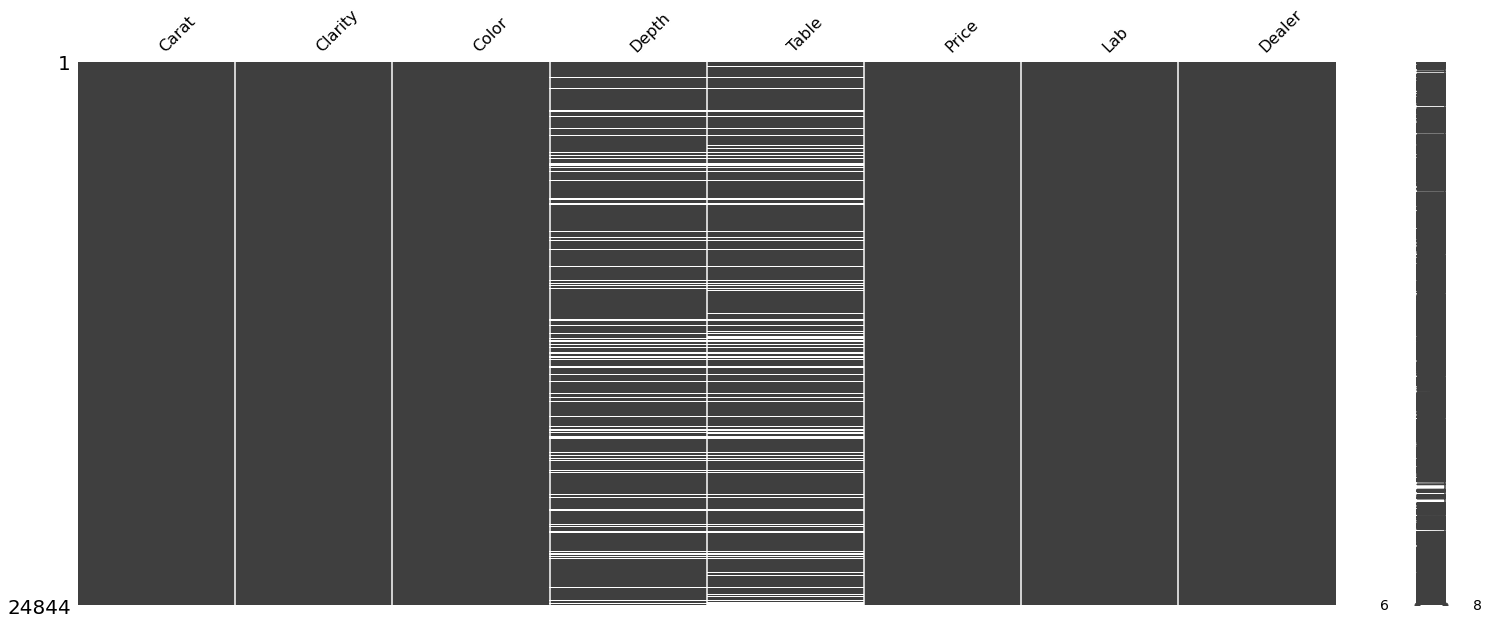

In [5]:
# It looks like there are only missing values in depth and table. I'll visualize the missing values
msno.matrix(diamonds)

Other than the fact that all of the missing values appear to be confined to only two columns, and they are often missing together, there is very little pattern to the missing data. The easy solution here would be to drop these columns. However, there may be some significance to the fact that they are both simultaneously missing. Additionally, these data represent ~17.06% of the overall data set so I don't think I want to drop them all. Additionally, given the size of the samples missing values compared to the overall size of the dataset (and despite the fact that the data should be bounded between 40 and 80), I'm reluctant to impute using the mean because I'm afraid of artificially centering the true group mean. As a first pass, I'll try imputing the missing depth and table values using linear regression. However, before I do this I'll need to check for any outliers in table and depth that may effect the linear regression models. 

Text(0.5, 1.0, 'Histogram of Depth (log)')

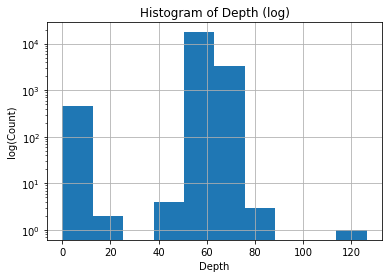

In [6]:
#To check for outliers I'll take a look at the histograms
#First depth

diamonds.Depth.hist()
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('log(Count)')
plt.title('Histogram of Depth (log)')

Text(0.5, 1.0, 'Histogram of Table (log)')

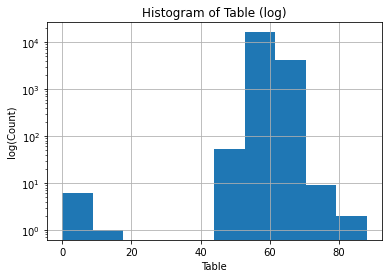

In [7]:
#Next I'll take a look at table
diamonds.Table.hist()
plt.yscale('log')
plt.xlabel('Table')
plt.ylabel('log(Count)')
plt.title('Histogram of Table (log)')

Given the definition of both depth and table (being the percentage of the width of the table and depth with respect to the overall width), there are clearly some erroneous values in the data set. A value of zero would indicate a diamond with infinite width. Furthermore, applying a little domain knowledge, cutters would not cut a diamond (regardless of cut style) with a table or depth value greater than 20 percentage points away from 60, and it appears we have several diamonds that fall out of that range. I'll plan to convert these values to NaNs and impute those values as well. 

Next I need to look for any outliers in the price column, as outliers there will also bias the imputed depth/table values.

In [88]:
#Convert outlier depth and table to NaNs. 

diamonds['Depth'][diamonds['Depth'] > 80] = np.nan 
diamonds['Depth'][diamonds['Depth'] < 40] = np.nan 
diamonds['Table'][diamonds['Table'] > 80] = np.nan 
diamonds['Table'][diamonds['Table'] < 40] = np.nan 

Text(0.5, 0, 'Price')

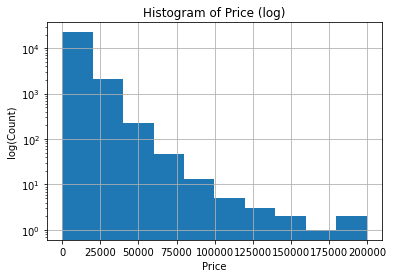

In [9]:
diamonds.Price.hist()
plt.yscale('log')
plt.title('Histogram of Price (log)')
plt.ylabel('log(Count)')
plt.xlabel('Price')


Text(0.5, 0, 'Price')

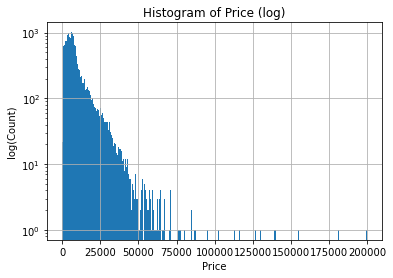

In [10]:
#I'm going to need more bins to look for low end outliers. I'll also need to take a look at the $175,000 + a little closer

diamonds.Price.hist(bins = 500)
plt.yscale('log')
plt.title('Histogram of Price (log)')
plt.ylabel('log(Count)')
plt.xlabel('Price')


In [11]:
#lets take a look at the summary stats
diamonds.describe()

,Carat,Depth,Table,Price,Dealer
count,24844.000000,20895.000000,20597.000000,24844.000000,24844.000000
mean,1.167164,61.346509,59.227266,9161.605015,117.490058
std,0.592976,2.146328,2.883957,9088.081760,73.755264
min,0.300000,43.000000,45.000000,9.000000,1.000000
25%,0.740000,60.100000,57.000000,3928.000000,51.000000
50%,1.020000,61.400000,59.000000,6636.000000,121.000000
75%,1.500000,62.500000,61.000000,10706.000000,186.000000
max,3.990000,76.100000,76.000000,199680.000000,237.000000


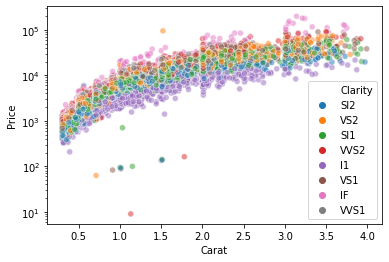

In [12]:
#Well it looks like there is a $9.00 diamond. I'm going to plot Price by Carat to see if these values make sense compared to carat

sns.scatterplot(x = 'Carat', y = 'Price', data= diamonds, alpha = 0.5, hue = 'Clarity')
plt.yscale('log')

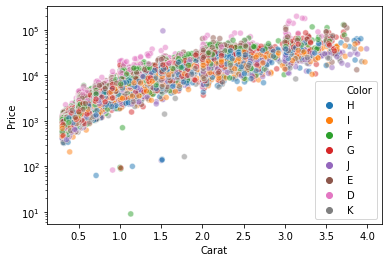

In [13]:
#It looks like there may be some outliers between $9 and $100 diamonds. I'll make the same plot with grouped by color.

sns.scatterplot(x = 'Carat', y = 'Price', data= diamonds, alpha = 0.5, hue = 'Color')
plt.yscale('log')

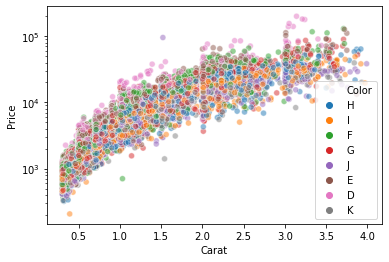

In [14]:
#It looks like the diamonds below ~$100 are likely errors given their carat, color and clarity. I'm going to drop these few. 

index = diamonds[diamonds['Price'] < 200].index
diamonds.drop(index = index, inplace = True)
diamonds = diamonds.reindex()
sns.scatterplot(x = 'Carat', y = 'Price', data= diamonds, alpha = 0.5, hue = 'Color')
plt.yscale('log')

In [15]:
#That looks better. Now I'll create an imputed value for all values and impute the missing values from this column.
#Create a copy of the diamonds data without any NaNs and get the dummies.
diamondsNoNaN = diamonds.dropna()
diamondsNoNaN = pd.get_dummies(diamondsNoNaN)
diamondsPred = pd.get_dummies(diamonds)
XDepth = diamondsNoNaN.drop(['Depth', 'Table'], axis = 1)
yDepth = diamondsNoNaN['Depth']
yTable = diamondsNoNaN['Table']
XPred = diamondsPred.drop(['Depth', 'Table'], axis = 1)

impDepth = linear_model.LinearRegression()
impTable = linear_model.LinearRegression()
impDepth.fit(XDepth, yDepth)
impTable.fit(XDepth, yTable)
DepthPred = impDepth.predict(XPred)
TablePred = impTable.predict(XPred)


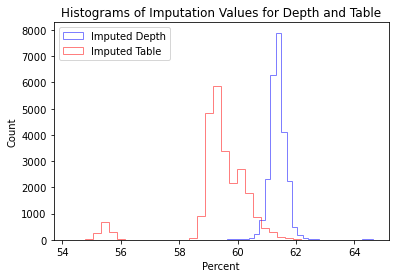

In [16]:
#Now I'll add the imputed depth values to the diamonds DF

diamonds['ImputedDepth'] = DepthPred
diamonds['ImputedTable'] = TablePred

#Lets take a look at the histogram of the imputation values.
_ = plt.hist(DepthPred, color = 'b', alpha = 0.5, histtype = 'step', bins = 30)
_ = plt.hist(TablePred, color = 'r', alpha = 0.5, histtype = 'step', bins = 30)
plt.ylabel('Count')
plt.xlabel('Percent')
plt.title('Histograms of Imputation Values for Depth and Table')
plt.legend(('Imputed Depth', 'Imputed Table'))
#

In [17]:
#These predictions look very good. They should be unimodal with a mean between 57 and 62.
#If the values are NaNs then replace the missing values with the imputed values. Otherwise keep them
diamonds['Depth'].fillna(diamonds['ImputedDepth'], inplace = True)
diamonds['Table'].fillna(diamonds['ImputedTable'], inplace = True)
#Drop the ImputedDepth and ImputedTable columns cause we don't need them anymore.
diamonds.drop(['ImputedDepth', 'ImputedTable'], axis= 1, inplace = True)

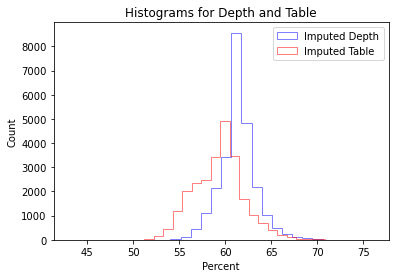

In [18]:
_ = plt.hist(diamonds.Depth, color = 'b', alpha = 0.5, histtype = 'step', bins = 30)
_ = plt.hist(diamonds.Table, color = 'r', alpha = 0.5, histtype = 'step', bins = 30)
plt.ylabel('Count')
plt.xlabel('Percent')
plt.title('Histograms for Depth and Table')
plt.legend(('Imputed Depth', 'Imputed Table'))

In [19]:
#These histograms look much better. Now I'll double check to see there aren't any missing values
pd.isnull(diamonds).sum()

Carat      0
Clarity    0
Color      0
Depth      0
Table      0
Price      0
Lab        0
Dealer     0
dtype: int64

## 3. EDA
Some of the EDA was already completed in the data wrangling step in the process of imputing the missing values, but here I'll continue that process to a broader univariate and mutlivariate EDA. 

Text(0.5, 1.0, 'Historgram of Labs')

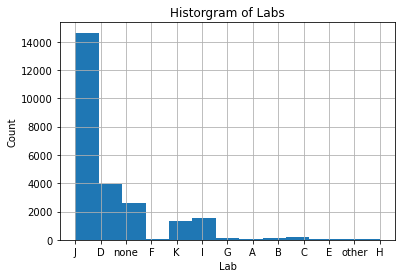

In [20]:
#I'll start by taking a looks at the other variables with some more histograms

diamonds.Lab.hist(bins = len(diamonds['Lab'].unique()))
plt.xlabel('Lab')
plt.ylabel('Count')
plt.title('Historgram of Labs')

Text(0.5, 1.0, 'Historgram of Dealer')

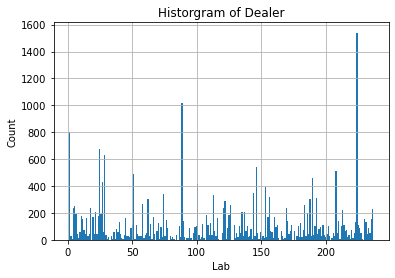

In [21]:
#It looks like J processes the most diamonds. Now lets look at the dealers.
diamonds.Dealer.hist(bins = len(diamonds['Dealer'].unique()))
plt.xlabel('Lab')
plt.ylabel('Count')
plt.title('Historgram of Dealer')

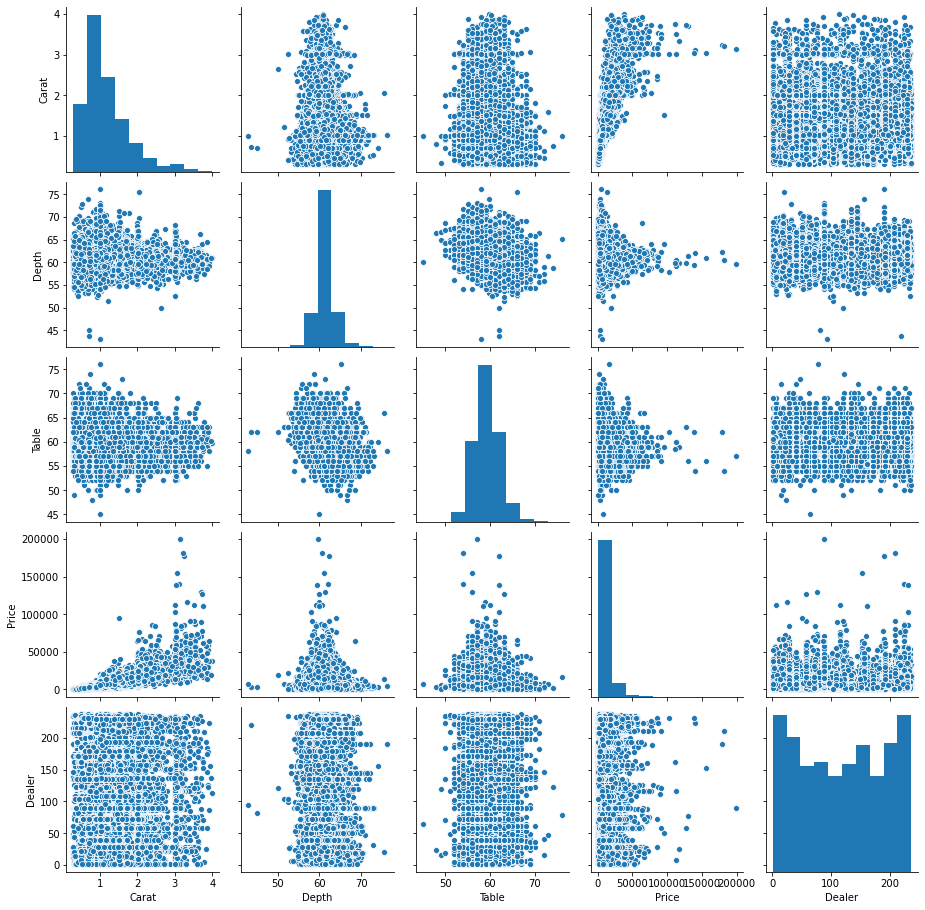

In [22]:
#There are a few dealers pushing a large volume of the diamonds. This shouldn't be a problem.
#Now I'll move on to some multivariate EDA. First I want to take a look at the relationships bewtween the features.

sns.pairplot(data = diamonds)

Looking at both table and depth, there is a bell shaped relationship between these two variables and the price. These may need a transformation to reflect the fact that the price will decrease the further these values get from the "ideal" of 60.

Additionally, the relationship between carat and price may not be linear. I'll take a look at a couple possible transformations of price and carat. 

In [23]:
#First I'll deal with the price and table values. I'll also standardize the value. I'll use a function to account for the 
#deviations from ideal

diamonds['DepthT'] = diamonds.Depth.apply(lambda x: 1-np.abs(x - 60)/60)
diamonds['TableT'] = diamonds.Table.apply(lambda x: 1-np.abs(x - 60)/60)

Text(0.5, 1.0, 'Square Root of Price vs. Tansformed Depth')

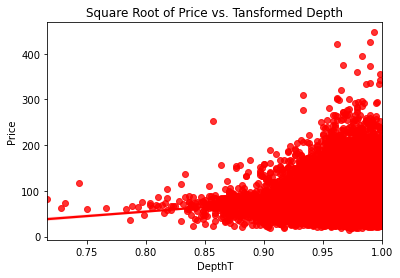

In [24]:
sns.regplot(x = diamonds.DepthT, y = np.sqrt(diamonds.Price), color = 'r')
plt.title('Square Root of Price vs. Tansformed Depth')

Text(0.5, 1.0, 'Square Root of Price vs. Tansformed Price')

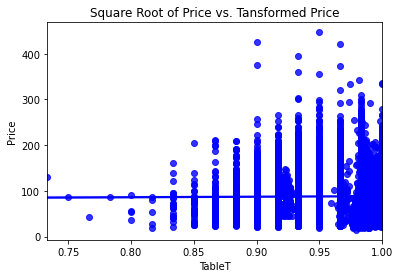

In [25]:
#It looks like there is definitely a relationship between price and the transformed Depth. 
#Now lets check the Transformed table and price

sns.regplot(x = diamonds.TableT, y = np.sqrt(diamonds.Price), color = 'b')
plt.title('Square Root of Price vs. Tansformed Price')

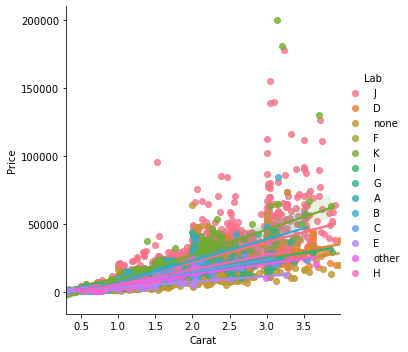

In [26]:
#Next I want to investigate the possibility of intereaction terms

sns.lmplot(x ='Carat', y = 'Price', hue = 'Lab', data = diamonds)

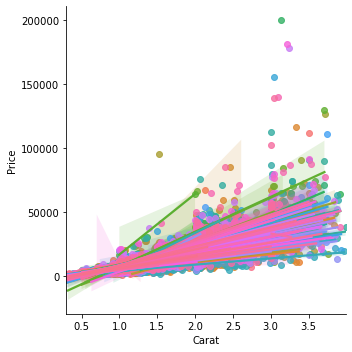

In [27]:
#There is likely an interaction effect between lad and carat.
#lets look at dealer and carat
sns.lmplot(x ='Carat', y = 'Price', hue = 'Dealer', data = diamonds, legend = False)

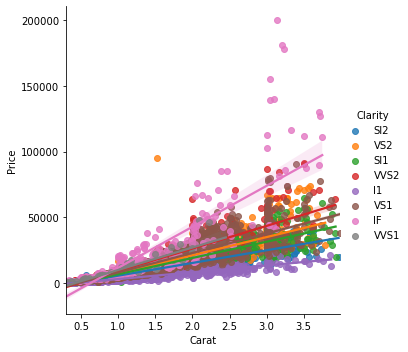

In [28]:
#It looks like there could be an interaction there as well. 
#Next I'll take a look at a potential interaction between carat and clarity

sns.lmplot(x ='Carat', y = 'Price', hue = 'Clarity', data = diamonds)

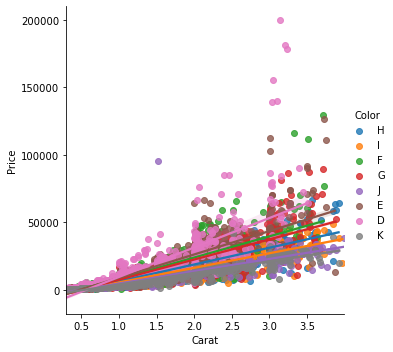

In [29]:
#And Color next
sns.lmplot(x ='Carat', y = 'Price', hue = 'Color', data = diamonds)

Text(0.5, 1.0, 'Box plot of price by lab')

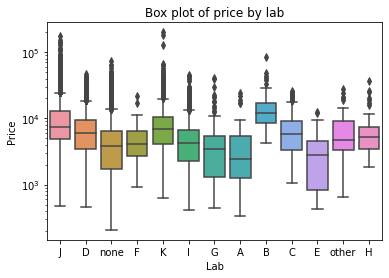

In [30]:
#Now lets take a look at the multivariate relationships between price and categorical values
#First lets look at lab
sns.boxplot(x = 'Lab', y = 'Price', data = diamonds)
plt.yscale('log')
plt.title('Box plot of price by lab')

Text(0.5, 1.0, 'Box plot of price by Clarity')

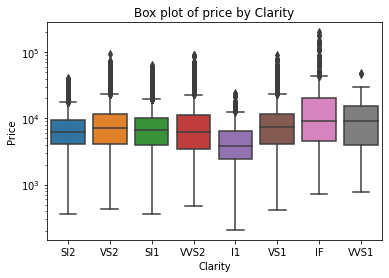

In [31]:
#Next lets take a look at Clarity
sns.boxplot(x = 'Clarity', y = 'Price', data = diamonds)
plt.yscale('log')
plt.title('Box plot of price by Clarity')

Text(0.5, 1.0, 'Box plot of price by Color')

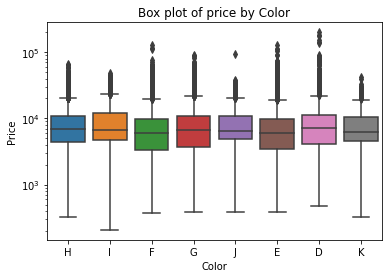

In [32]:
#Finally lets take a look at color
sns.boxplot(x = 'Color', y = 'Price', data = diamonds)
plt.yscale('log')
plt.title('Box plot of price by Color')

## 4. Modeling

Next I'll begin the modeling. I need to split the data into training, testing and testing data. First I'll start by building a relatively simple model

In [33]:
# I need to create a final hold out test set, I want to stratify on Clarity to ensure I have all values of clarity in both data sets
X = diamonds.drop(['Price', 'Depth', 'Table'], axis = 1)
y = diamonds['Price']

X, xHold, y, yHold = train_test_split(X, y, test_size = 0.2, stratify = diamonds['Clarity'], random_state = 4321)


In [34]:
# I'll start with a simple linear model with only a couple features

X1 = X[['Carat', 'DepthT', 'TableT']]

#Split the data into training and testing

xTrain, xTest, yTrain, yTest = train_test_split(X1, y, test_size = 0.2, random_state = 1234)

model1 = linear_model.LinearRegression()
model1.fit(xTrain, yTrain)
yPred1 = model1.predict(xTest)
R2_1 = r2_score(yTest, yPred1)
print('The Rsquared for model 1 is: ', R2_1)

The Rsquared for model 1 is:  0.7045922507001567


The mean squared error for model 1 is:  23402468.64505386


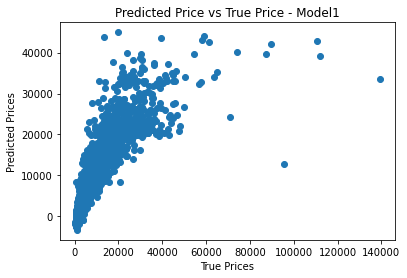

In [35]:
plt.scatter(yTest, yPred1)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Price vs True Price - Model1')
MSE1 = mean_squared_error(yTest, yPred1)
print('The mean squared error for model 1 is: ', MSE1)

In [36]:
#Model 1 only predicts ~70% of the error
#I'll try to add a couple categorical variables to see if I could improve the model

X2 = X[['Carat', 'DepthT', 'TableT', 'Color', 'Clarity']]
X2 = pd.get_dummies(X2)

xTrain, xTest, yTrain, yTest = train_test_split(X2, y, test_size = 0.2, random_state = 1234)

model2 = linear_model.LinearRegression()
model2.fit(xTrain, yTrain)
yPred2 = model2.predict(xTest)
R2_2 = r2_score(yTest, yPred2)
print('The Rsquared for model 2 is: ', R2_2)

The Rsquared for model 2 is:  0.8076754156031214


The mean squared error for model 2 is:  15236127.24002212


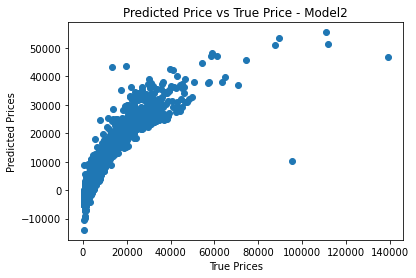

In [37]:
plt.scatter(yTest, yPred2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Price vs True Price - Model2')
MSE2 = mean_squared_error(yTest, yPred2)
print('The mean squared error for model 2 is: ', MSE2)

In [38]:
# Model 2 looks quite a bit better, but it's still not captureing all of the variance
#I think I could improve the model by predicting the squared-root of the price

X3 = X[['Carat', 'DepthT', 'TableT', 'Color', 'Clarity']]
X3 = pd.get_dummies(X3)

xTrain, xTest, yTrain, yTest = train_test_split(X3, np.sqrt(y), test_size = 0.2, random_state = 1234)

model3 = linear_model.LinearRegression()
model3.fit(xTrain, yTrain)
yPred3 = model3.predict(xTest)
R2_3 = r2_score(yTest, yPred3)
print('The Rsquared for model 3 is: ', R2_3)

The Rsquared for model 3 is:  0.9093129923220095


The mean squared error for model 3 is:  127.5776108597552


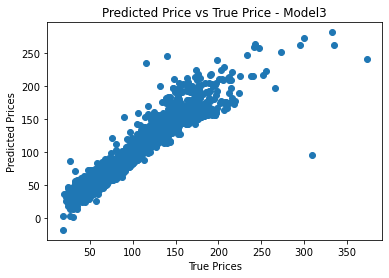

In [39]:
plt.scatter(yTest, yPred3)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Price vs True Price - Model3')
MSE3 = mean_squared_error(yTest, yPred3)
print('The mean squared error for model 3 is: ', MSE3)

In [40]:
#Model 3 is looking a lot better. I'll try to see if lab can improve even more

X4 = X[['Carat', 'DepthT', 'TableT', 'Color', 'Clarity', 'Lab']]
X4 = pd.get_dummies(X4)

xTrain, xTest, yTrain, yTest = train_test_split(X4, np.sqrt(y), test_size = 0.2, random_state = 1234)

model4 = linear_model.LinearRegression()
model4.fit(xTrain, yTrain)
yPred4 = model4.predict(xTest)
R2_4 = r2_score(yTest, yPred4)
print('The Rsquared for model 4 is: ', R2_4)

The Rsquared for model 4 is:  0.9172790727943178


The mean squared error for model 4 is:  116.37100540881477


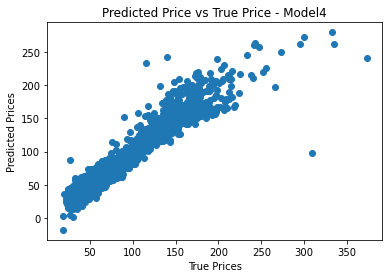

In [41]:
plt.scatter(yTest, yPred4)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Price vs True Price - Model4')
MSE4 = mean_squared_error(yTest, yPred4)
print('The mean squared error for model 4 is: ', MSE4)

In [42]:
#Model 4 is looking a lot better. I'll try to see if dealer can improve even more

X5 = X[['Carat', 'DepthT', 'TableT', 'Color', 'Clarity', 'Lab', 'Dealer']]
X5['Dealer'] = X5['Dealer'].astype(str)
X5 = pd.get_dummies(X5)

xTrain, xTest, yTrain, yTest = train_test_split(X5, np.sqrt(y), test_size = 0.2, random_state = 1234)

model5 = linear_model.LinearRegression()
model5.fit(xTrain, yTrain)
yPred5 = model5.predict(xTest)
R2_5 = r2_score(yTest, yPred5)
print('The Rsquared for model 5 is: ', R2_5)

The Rsquared for model 5 is:  0.9227779991241721


The mean squared error for model 5 is:  108.63516869505274


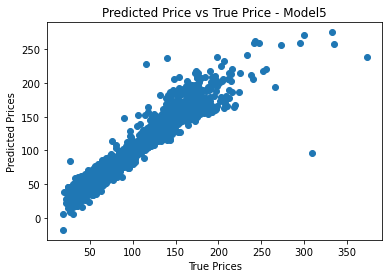

In [43]:
plt.scatter(yTest, yPred5)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Price vs True Price - Model5')
MSE5 = mean_squared_error(yTest, yPred5)
print('The mean squared error for model 5 is: ', MSE5)

In [44]:
X5.shape

(19866, 263)

In [45]:
#Next I'm going to explore whether adding interaction terms will increase the model's performance. However, adding these
#terms drastically increases the dimensionality of the features so I'll attempt to reduce the dimension with PCA. 

interaction = preprocessing.PolynomialFeatures(2, interaction_only = True)
X5_ = X[['Carat', 'DepthT', 'TableT', 'Color', 'Clarity', 'Lab']]
X5_ = pd.get_dummies(X5_)
X6 = interaction.fit_transform(X5)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
pca.fit(X5)
X6 = pca.transform(X5)

Text(0.5, 1.0, 'Scree Plot for X6')

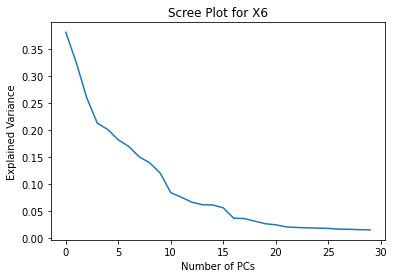

In [54]:
plt.plot(pca.explained_variance_)
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.title('Scree Plot for X6')

In [50]:
#I'll use all 30 of the principle components since this will still significantly reduce the dimensionality

xTrain, xTest, yTrain, yTest = train_test_split(X6, np.sqrt(y), test_size = 0.2, random_state = 1234)

model6 = linear_model.LinearRegression()
model6.fit(xTrain, yTrain)
yPred6 = model6.predict(xTest)
R2_6 = r2_score(yTest, yPred6)
print('The Rsquared for model 6 is: ', R2_6)

The Rsquared for model 6 is:  0.9177287141211815


The mean squared error for model 6 is:  115.73845431143182


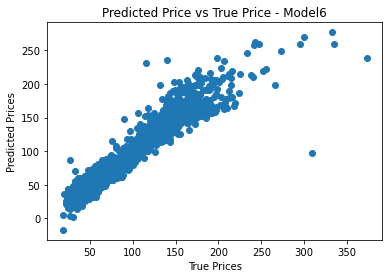

In [52]:
plt.scatter(yTest, yPred6)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Price vs True Price - Model6')
MSE6 = mean_squared_error(yTest, yPred6)
print('The mean squared error for model 6 is: ', MSE6)

In [238]:
#Going to try clustering the carat and dealer as a feature then I'll use the clusters as an interaction term. 
# In order to make sure the entire dataset has the features, we need to perform the klustering on the whole data set
# and create a new hold out set.
X = diamonds.drop(['Price', 'Depth', 'Table'], axis = 1)
y = diamonds['Price']

Xclf = X[['Carat']]
Xclf['Price'] = y
yclf = X['Dealer'].astype(str)

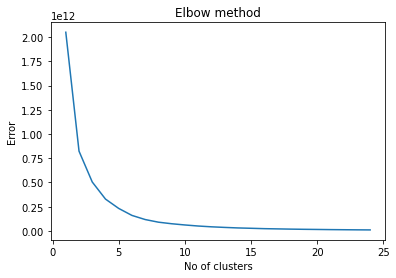

In [239]:
from sklearn.cluster import KMeans
Error = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Xclf)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 25), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()
# Lets take a look at the number of clusters

In [241]:
#Looks like 8 should work just fine. 
kmeans = KMeans(n_clusters = 8)
yKmeans = kmeans.fit_predict(Xclf)

In [264]:
#Now that I have my clusters, I'll use them to generate interaction terms on the dealer without 

XCluster = X[['Carat', 'TableT', 'DepthT']]
XCluster['DCluster'] = yKmeans.astype(str)
XCluster = pd.get_dummies(XCluster)
inter = interaction.fit_transform(XCluster)
inter = pd.DataFrame(inter)
addTerms = diamonds[['Color', 'Clarity', 'Lab', 'Price']]
XCluster.reset_index(drop = True, inplace = True)
addTerms.reset_index(drop = True, inplace = True)
inter.reset_index(drop = True, inplace = True)
XCluster = pd.concat([XCluster.reset_index(drop=True), addTerms.reset_index(drop=True)], axis = 1)
XCluster = pd.get_dummies(XCluster)
XCluster = pd.concat([XCluster.reset_index(drop=True), inter.reset_index(drop=True)], axis = 1)

    
y = XCluster['Price']
XCluster.drop('Price', inplace = True, axis = 1)
X7, xHold, y, yHold = train_test_split(XCluster, y, test_size = 0.2, stratify = diamonds['Clarity'], random_state = 4321)

In [265]:

xTrain, xTest, yTrain, yTest = train_test_split(X7, np.sqrt(y), test_size = 0.2, random_state = 1234)

model7 = linear_model.LinearRegression()
model7.fit(xTrain, yTrain)
yPred7 = model7.predict(xTest)
R2_7 = r2_score(yTest, yPred7)
print('The Rsquared for model 7 is: ', R2_7)

The Rsquared for model 7 is:  0.9808675809882611


The mean squared error for model 7 is:  26.915303194834653


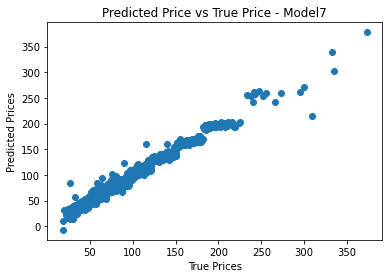

In [266]:
#That looks much better.
plt.scatter(yTest, yPred7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Price vs True Price - Model7')
MSE7 = mean_squared_error(yTest, yPred7)
print('The mean squared error for model 7 is: ', MSE7)

## 6. Select final model. Test model on holdout set.

Model 7 is by far the best performing model. Now it's time to see how the model performs on the holdout set.

In [267]:

yFinalPred = model7.predict(xHold)
R2 = r2_score(np.sqrt(yHold), yFinalPred)
print('The Rsquared is: ', R2)

The Rsquared is:  0.9797790480538421


The mean squared error for the model is:  29.667956731380134


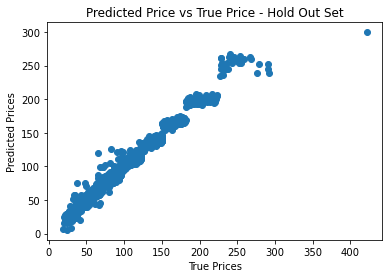

In [268]:
plt.scatter(np.sqrt(yHold), yFinalPred)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted Price vs True Price - Hold Out Set')
MSE = mean_squared_error(np.sqrt(yHold), yFinalPred)
print('The mean squared error for the model is: ', MSE)